<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model Perdiction - Project By Erez Levy - Part V - One Hot Encoding

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Import tmdb_model as pickel file from my Google Drive

In [1]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_model = pickle.load(file)
    print(f"tmdb_model loaded from {file_path} successfully.")

    #  use the loaded DataFrame (tmdb_eda)
    #  display the first few rows:
    print(tmdb_model.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")


Mounted at /content/drive
tmdb_model loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl successfully.
         id  number_of_episodes  vote_average first_air_date last_air_date  \
0   39280.0           -0.669403     -0.758413            NaT           NaT   
1  222838.6           -0.423177      1.451998     2023-05-28    2023-06-25   
2  222838.6           -0.176951     -0.758413     2014-05-15    2014-07-17   
3   34835.0           -0.078460      1.078811     2006-10-06    2006-12-22   
4   42598.0           -0.669403     -0.758413            NaT           NaT   

    episode_run_time  air_time  log_popularity  total_runtime  \
0  21863154728639042      49.0        0.904220      -0.503073   
1  10462587558510787      28.0        1.314755      -0.173808   
2   1022809265560642      63.0        0.904220      -0.503073   
3  21863154728639042      77.0        1.476119      -0.028931   
4   1022809265560642      49.0        0.904220      -0.503073   

   v

# One-Hot Encoding

Convert categorical variables into a format that can be provided to ML algorithms to do a better job in prediction. This typically involves creating binary columns for each category in a categorical feature.

In [2]:
tmdb_hot=tmdb_model.copy()
tmdb_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78501 entries, 0 to 82871
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            78501 non-null  float64       
 1   number_of_episodes            78501 non-null  float64       
 2   vote_average                  78501 non-null  float64       
 3   first_air_date                58633 non-null  datetime64[ns]
 4   last_air_date                 59105 non-null  datetime64[ns]
 5   episode_run_time              78501 non-null  int64         
 6   air_time                      78501 non-null  float64       
 7   log_popularity                78501 non-null  float64       
 8   total_runtime                 78501 non-null  float64       
 9   vote_count_to_episodes_ratio  60393 non-null  float64       
 10  weighted_vote_average         78501 non-null  float64       
 11  popularity_score              785

# Corroletion TMDB Dataset


Correlation measures the strength and direction of a linear relationship between two variables. In the TMDB dataset, this could be the relationship between features like:

**vote_average and popularity:**

 Do movies with higher average ratings tend to be more popular?

**number_of_episodes and total_runtime:**

 Does the number of episodes in a show correlate with its total runtime?

**vote_count and popularity_score:**

 Is there a connection between the number of votes a show receives and its calculated popularity score?

**Spearman's Rank Correlation**

The method='spearman' argument specifies that Spearman's rank correlation is used. This method is non-parametric, meaning it doesn't assume a normal distribution of the data. It assesses the monotonic relationship between variables – whether they tend to increase or decrease together, regardless of the specific shape of the relationship.

**Interpreting Correlation Values**

The correlation coefficient ranges from -1 to +1:

+1: Perfect positive correlation. As one variable increases, the other increases proportionally.
-1: Perfect negative correlation. As one variable increases, the other decreases proportionally.
0: No correlation. There is no linear relationship between the variables.
Values between -1 and +1 indicate varying degrees of correlation:

Strong correlation: Values closer to -1 or +1 (e.g., -0.8, +0.7)
Moderate correlation: Values around -0.5 or +0.5
Weak correlation: Values closer to 0 (e.g., -0.2, +0.3)

**Example Interpretation**

If the correlation between vote_average and popularity is +0.7, it suggests a strong positive correlation. This means that TV shows with higher average ratings tend to be more popular.

**Important Considerations**

Correlation does not imply causation:

 Even if two variables are strongly correlated, it doesn't mean that one causes the other. There could be other factors influencing both variables.

**Context is crucial:**

 The interpretation of correlation should be based on the specific dataset and domain knowledge. A correlation of 0.5 might be considered strong in some contexts but weak in others.
How to use the correlation results:

**Feature Selection:**

 Identify features that are strongly correlated with your target variable (e.g., popularity). These features are likely to be important predictors in your machine learning model.
Feature Engineering:

 Consider creating new features by combining correlated features. For example, you could create a feature that combines 'vote_average' and 'vote_count' to capture a more comprehensive measure of audience approval.

**Multicollinearity:**

 If you find very strong correlations between predictor features (features you are using to predict your target), you might want to remove one of the highly correlated features to avoid multicollinearity issues in your model. Multicollinearity can make it difficult to interpret the individual effects of features and can lead to unstable model estimates.

In [3]:
tmdb_hot.corr(method='spearman')

,id,number_of_episodes,vote_average,first_air_date,last_air_date,episode_run_time,air_time,log_popularity,total_runtime,vote_count_to_episodes_ratio,weighted_vote_average,popularity_score,popularity
id,1.000000,0.227290,0.054508,0.603677,0.603684,-0.259249,-0.236679,0.090573,-0.040125,-0.165375,0.024913,0.105238,0.090573
number_of_episodes,0.227290,1.000000,0.372206,0.506448,0.520394,0.214567,0.409553,0.682339,0.676012,0.004140,0.397420,0.580933,0.682339
vote_average,0.054508,0.372206,1.000000,0.352557,0.357738,0.217593,0.128322,0.552825,0.404107,0.869878,0.947569,0.866341,0.552825
first_air_date,0.603677,0.506448,0.352557,1.000000,0.983614,0.086228,-0.141517,0.420748,0.357802,0.177385,0.369196,0.458732,0.420748
last_air_date,0.603684,0.520394,0.357738,0.983614,1.000000,0.085456,-0.100357,0.425588,0.363748,0.179345,0.374988,0.463847,0.425588
episode_run_time,-0.259249,0.214567,0.217593,0.086228,0.085456,1.000000,0.151825,0.275594,0.605306,0.205478,0.249857,0.273325,0.275594
air_time,-0.236679,0.409553,0.128322,-0.141517,-0.100357,0.151825,1.000000,0.247252,0.293682,0.044691,0.152645,0.185415,0.247252
log_popularity,0.090573,0.682339,0.552825,0.420748,0.425588,0.275594,0.247252,1.000000,0.599800,0.478835,0.627941,0.852867,1.000000
total_runtime,-0.040125,0.676012,0.404107,0.357802,0.363748,0.605306,0.293682,0.599800,1.000000,0.198683,0.445256,0.552957,0.599800
vote_count_to_episodes_ratio,-0.165375,0.004140,0.869878,0.177385,0.179345,0.205478,0.044691,0.478835,0.198683,1.000000,0.948797,0.867286,0.478835


# HeatMap Dataset

<Axes: >

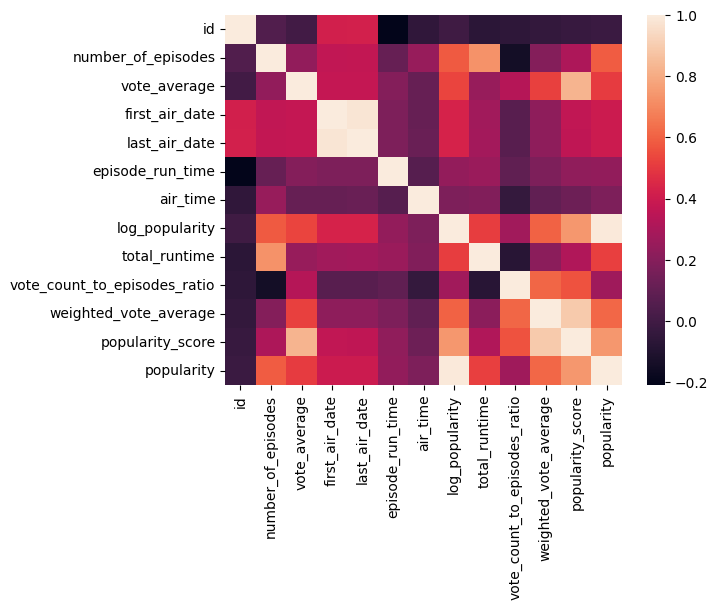

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(tmdb_hot.corr())

In [5]:
tmdb_hot.columns

Index(['id', 'number_of_episodes', 'vote_average', 'first_air_date',
       'last_air_date', 'episode_run_time', 'air_time', 'log_popularity',
       'total_runtime', 'vote_count_to_episodes_ratio',
       'weighted_vote_average', 'popularity_score', 'popularity'],
      dtype='object')

# Chi-Square Test

#The Chi-Square Test

The Chi-Square test compares the observed frequencies of different combinations of categories in your data to the expected frequencies if there were no relationship between the variables. If the observed frequencies deviate significantly from the expected frequencies, it suggests that there is an association between the variables.

**Example (Correlation)**

Analyzing the correlation between a TV show's popularity and its vote average in  tmdb_eda DataFrame. If the a p-value of 0.0000 for this correlation, it means there's a statistically significant relationship between popularity and vote average.

# Chi-Square testing between episode_run_time & popularity

In [6]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select specified columns
selected_columns = ['id', 'number_of_episodes', 'vote_average', 'first_air_date',
       'last_air_date', 'episode_run_time', 'air_time', 'log_popularity',
       'total_runtime', 'vote_count_to_episodes_ratio',
       'weighted_vote_average', 'popularity_score', 'popularity']
tmdb_chi = tmdb_hot[selected_columns]
df_chi = tmdb_chi.dropna() # Changed df_chi to tmdb_chi to assign the DataFrame

# Select two categorical columns for Chi-Square testing (e.g., 'origin_country' vs 'production_companies')
contingency_table = pd.crosstab(df_chi['episode_run_time'], df_chi['popularity'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi-Square Statistic: 871193.5373
P-Value: 0.0000
Degrees of Freedom: 722190


#Chi-Square testing between vote_everage & total_runtime

A small p-value (typically less than 0.05) indicates that the observed data is unlikely to occur by chance alone, suggesting a significant association between the variables.

In [7]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select specified columns
selected_columns = ['id', 'number_of_episodes', 'vote_average', 'first_air_date',
       'last_air_date', 'episode_run_time', 'air_time', 'log_popularity',
       'total_runtime', 'vote_count_to_episodes_ratio',
       'weighted_vote_average', 'popularity_score', 'popularity']
tmdb_chi = tmdb_hot[selected_columns]
df_chi = tmdb_chi.dropna() # Changed df_chi to tmdb_chi to assign the DataFrame

# Select two categorical columns for Chi-Square testing (e.g., 'origin_country' vs 'spoken_languages')
contingency_table = pd.crosstab(df_chi['vote_average'], df_chi['total_runtime'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi-Square Statistic: 4007701.6270
P-Value: 0.0000
Degrees of Freedom: 2196468


# The Chi-Square Test between air_time & popularity_score

A small p-value (typically less than 0.05) indicates that the observed data is unlikely to occur by chance alone, suggesting a significant association between the variables.

In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select specified columns
selected_columns = ['id', 'number_of_episodes', 'vote_average', 'first_air_date',
       'last_air_date', 'episode_run_time', 'air_time', 'log_popularity',
       'total_runtime', 'vote_count_to_episodes_ratio',
       'weighted_vote_average', 'popularity_score', 'popularity']
tmdb_chi = tmdb_hot[selected_columns]
df_chi = tmdb_chi.dropna() # Changed df_chi to tmdb_chi to assign the DataFrame

# Select two categorical columns for Chi-Square testing (e.g., 'origin_country' vs 'networks')
contingency_table = pd.crosstab(df_chi['air_time'], df_chi['popularity_score'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi-Square Statistic: 86543003.4937
P-Value: 0.0000
Degrees of Freedom: 71338608


#Missing

Understanding Missing Data in TMDB

Missing data is a common occurrence in real-world datasets like TMDB. It means that for certain TV shows, some information might not have been collected or is unavailable. In your code, you are using the tmdb_hot DataFrame, which is a copy of your original dataset likely after some initial processing.

Identifying Missing Values

Your code uses these methods to identify missing data:

tmdb_hot.isnull().head(): This displays the first few rows of a DataFrame where True indicates a missing value and False indicates a non-missing value for each cell. It provides a quick visual check.

sns.heatmap(tmdb_hot.isnull(), yticklabels=False, cbar=False): This creates a heatmap visualization where missing values are represented by a different color (usually darker). It gives a broader overview of the missing data pattern across your dataset.

In [9]:
tmdb_hot.isnull().head()

,id,number_of_episodes,vote_average,first_air_date,last_air_date,episode_run_time,air_time,log_popularity,total_runtime,vote_count_to_episodes_ratio,weighted_vote_average,popularity_score,popularity
0,False,False,False,True,True,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,False,True,False,False,False


<Axes: >

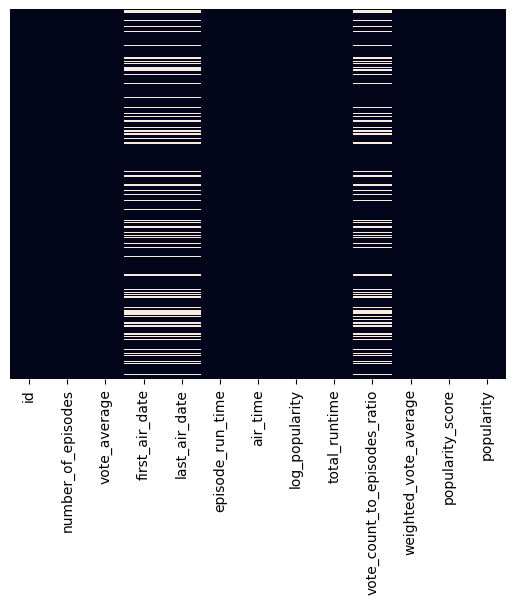

In [10]:
sns.heatmap(tmdb_hot.isnull(), yticklabels=False, cbar=False)

# Missing Values Analysis and Imputation

Understanding Missing Data in TMDB

Missing data is a common occurrence in real-world datasets like TMDB. It means that for certain TV shows, some information might not have been collected or is unavailable. In your code, you are using the tmdb_hot DataFrame, which is a copy of your original dataset likely after some initial processing.

Identifying Missing Values

In [11]:
print(tmdb_hot.isnull().sum())

id                                  0
number_of_episodes                  0
vote_average                        0
first_air_date                  19868
last_air_date                   19396
episode_run_time                    0
air_time                            0
log_popularity                      0
total_runtime                       0
vote_count_to_episodes_ratio    18108
weighted_vote_average               0
popularity_score                    0
popularity                          0
dtype: int64


# Outliers that change correlation or distribution

In [12]:
tmdb_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78501 entries, 0 to 82871
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            78501 non-null  float64       
 1   number_of_episodes            78501 non-null  float64       
 2   vote_average                  78501 non-null  float64       
 3   first_air_date                58633 non-null  datetime64[ns]
 4   last_air_date                 59105 non-null  datetime64[ns]
 5   episode_run_time              78501 non-null  int64         
 6   air_time                      78501 non-null  float64       
 7   log_popularity                78501 non-null  float64       
 8   total_runtime                 78501 non-null  float64       
 9   vote_count_to_episodes_ratio  60393 non-null  float64       
 10  weighted_vote_average         78501 non-null  float64       
 11  popularity_score              785

In [13]:
tmdb_hot.corr()

,id,number_of_episodes,vote_average,first_air_date,last_air_date,episode_run_time,air_time,log_popularity,total_runtime,vote_count_to_episodes_ratio,weighted_vote_average,popularity_score,popularity
id,1.000000,0.050185,0.001665,0.414471,0.421014,-0.209207,-0.055920,-0.008558,-0.068677,-0.058557,-0.048016,-0.031572,-0.021583
number_of_episodes,0.050185,1.000000,0.233437,0.362792,0.367616,0.107461,0.245071,0.582628,0.729121,-0.145396,0.193285,0.309998,0.586957
vote_average,0.001665,0.233437,1.000000,0.373999,0.372796,0.196303,0.107386,0.527787,0.248074,0.333737,0.520628,0.825896,0.508607
first_air_date,0.414471,0.362792,0.373999,1.000000,0.980968,0.174326,0.109542,0.432765,0.277269,0.066793,0.225322,0.363659,0.399812
last_air_date,0.421014,0.367616,0.372796,0.980968,1.000000,0.173457,0.119561,0.431313,0.280025,0.068312,0.223266,0.361691,0.398532
episode_run_time,-0.209207,0.107461,0.196303,0.174326,0.173457,1.000000,0.060732,0.238614,0.253738,0.088844,0.177238,0.227905,0.232601
air_time,-0.055920,0.245071,0.107386,0.109542,0.119561,0.060732,1.000000,0.173657,0.183534,-0.039167,0.095864,0.130588,0.175962
log_popularity,-0.008558,0.582628,0.527787,0.432765,0.431313,0.238614,0.173657,1.000000,0.510859,0.275733,0.600732,0.742018,0.994636
total_runtime,-0.068677,0.729121,0.248074,0.277269,0.280025,0.253738,0.183534,0.510859,1.000000,-0.077231,0.213155,0.316744,0.514097
vote_count_to_episodes_ratio,-0.058557,-0.145396,0.333737,0.066793,0.068312,0.088844,-0.039167,0.275733,-0.077231,1.000000,0.608079,0.564376,0.270109


# Correlation with Outliers


There are several ways to deal with outliers when calculating correlation:

**Remove outliers:**
If the outliers are due to errors in data collection or entry, they can be removed from the dataset. However, it's important to carefully consider the reasons for removing outliers and to document the process.

**Transform the data:**
Transforming the data using a logarithmic or other transformation can reduce the impact of outliers on correlation.

**Use a robust correlation measure:**
Robust correlation measures, such as Spearman's rank correlation, are less sensitive to outliers than Pearson's correlation.

# Calculate correlations with outliers

Understanding the Impact of Outliers on Correlation

Outliers are data points that significantly deviate from the overall pattern of your data. They can have a substantial impact on correlation calculations, potentially leading to misleading results. Here's why:

**Inflated or Deflated Correlation:**

Outliers can artificially inflate or deflate the correlation coefficient, making the relationship between variables appear stronger or weaker than it actually is.

**Distorted Relationships:**

Outliers can distort the linear relationship between variables, making it difficult to accurately assess the true correlation.

In [14]:
import numpy as np
from scipy import stats

# Calculate correlations with outliers
correlation_with_outliers = tmdb_hot.corr()
# Calculate correlations with outliers
outlier_threshold = 2.5  # Adjust as needed
# Find indices of outliers
outlier_indices = np.where(np.abs(stats.zscore(tmdb_hot.select_dtypes(include=np.number))) > outlier_threshold) #Only calculate zscore for numerical features.
print("Correlation with Outliers:")
print(correlation_with_outliers)

Correlation with Outliers:
                                    id  number_of_episodes  vote_average  \
id                            1.000000            0.050185      0.001665   
number_of_episodes            0.050185            1.000000      0.233437   
vote_average                  0.001665            0.233437      1.000000   
first_air_date                0.414471            0.362792      0.373999   
last_air_date                 0.421014            0.367616      0.372796   
episode_run_time             -0.209207            0.107461      0.196303   
air_time                     -0.055920            0.245071      0.107386   
log_popularity               -0.008558            0.582628      0.527787   
total_runtime                -0.068677            0.729121      0.248074   
vote_count_to_episodes_ratio -0.058557           -0.145396      0.333737   
weighted_vote_average        -0.048016            0.193285      0.520628   
popularity_score             -0.031572            0.309998   

# Heatmap-Correlation with Outliers

<Axes: >

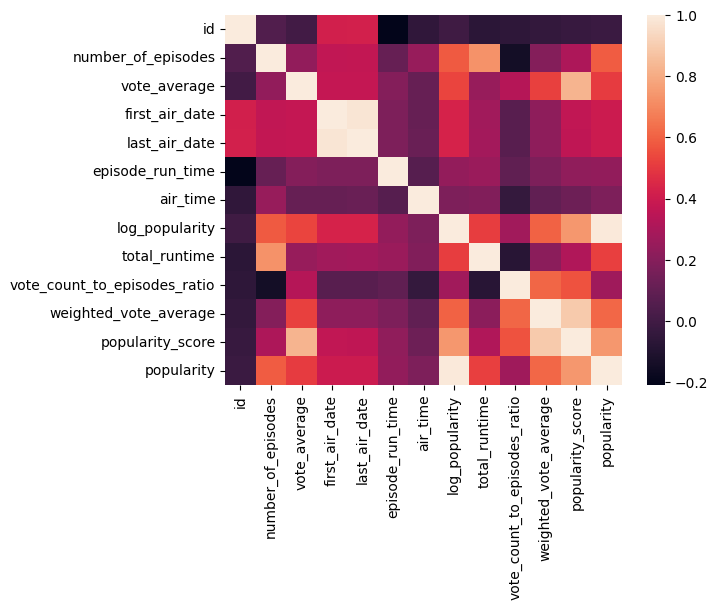

In [15]:
sns.heatmap(correlation_with_outliers)

# Analysing outliers that change either correlation or distribution

In [16]:
tmdb_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78501 entries, 0 to 82871
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            78501 non-null  float64       
 1   number_of_episodes            78501 non-null  float64       
 2   vote_average                  78501 non-null  float64       
 3   first_air_date                58633 non-null  datetime64[ns]
 4   last_air_date                 59105 non-null  datetime64[ns]
 5   episode_run_time              78501 non-null  int64         
 6   air_time                      78501 non-null  float64       
 7   log_popularity                78501 non-null  float64       
 8   total_runtime                 78501 non-null  float64       
 9   vote_count_to_episodes_ratio  60393 non-null  float64       
 10  weighted_vote_average         78501 non-null  float64       
 11  popularity_score              785

In [17]:
import numpy as np
from scipy import stats

# Assuming 'tmdb_hot' is your DataFrame

outliers_change_corr_or_dist = []  # Initialize an empty list

# Set the Z-score threshold
threshold = 2.5  # Adjust as needed

# Calculate Z-scores for numerical features
z_scores = np.abs(stats.zscore(tmdb_hot.select_dtypes(include=np.number)))

# Find outlier indices
outlier_indices = np.where(z_scores > threshold)

# If an outlier is detected, add its index to the list
# The change is on this line, we are now iterating through outlier_indices and appending to the list
for outlier_index in outlier_indices[0]:
    outliers_change_corr_or_dist.append(outlier_index)

# Print the outliers that change either correlation or distribution
print("Outliers changing either correlation or distribution:", outliers_change_corr_or_dist)

# Print outlier indices and corresponding values
print("Outlier Indices:", outlier_indices)
#print("Outlier Values:", tmdb_hot.iloc[outlier_indices])  # Uncomment to see values

Outliers changing either correlation or distribution: [np.int64(12), np.int64(12), np.int64(39), np.int64(39), np.int64(40), np.int64(40), np.int64(40), np.int64(40), np.int64(47), np.int64(47), np.int64(49), np.int64(53), np.int64(53), np.int64(55), np.int64(55), np.int64(56), np.int64(56), np.int64(68), np.int64(68), np.int64(68), np.int64(81), np.int64(81), np.int64(81), np.int64(81), np.int64(97), np.int64(97), np.int64(98), np.int64(98), np.int64(101), np.int64(101), np.int64(102), np.int64(102), np.int64(127), np.int64(127), np.int64(128), np.int64(149), np.int64(152), np.int64(152), np.int64(152), np.int64(152), np.int64(157), np.int64(158), np.int64(159), np.int64(178), np.int64(178), np.int64(178), np.int64(178), np.int64(178), np.int64(179), np.int64(188), np.int64(195), np.int64(195), np.int64(198), np.int64(198), np.int64(198), np.int64(198), np.int64(213), np.int64(213), np.int64(214), np.int64(217), np.int64(220), np.int64(220), np.int64(230), np.int64(230), np.int64(230)

# Remove outliers changing either correlation or distribution from the DataFrame

In [18]:
# Remove outliers changing either correlation or distribution from the DataFrame

tmdb_filtered = tmdb_hot.drop(index=tmdb_hot.index[outliers_change_corr_or_dist]) # Use tmdb_hot.index to get correct labels
#if there were any unnacesary outliers, they are now cleaned
tmdb_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67829 entries, 0 to 82871
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            67829 non-null  float64       
 1   number_of_episodes            67829 non-null  float64       
 2   vote_average                  67829 non-null  float64       
 3   first_air_date                48073 non-null  datetime64[ns]
 4   last_air_date                 48510 non-null  datetime64[ns]
 5   episode_run_time              67829 non-null  int64         
 6   air_time                      67829 non-null  float64       
 7   log_popularity                67829 non-null  float64       
 8   total_runtime                 67829 non-null  float64       
 9   vote_count_to_episodes_ratio  49794 non-null  float64       
 10  weighted_vote_average         67829 non-null  float64       
 11  popularity_score              678

# Calculate Correlation after Removing Outliers

Identify Outliers: Use techniques like Z-score or IQR (Interquartile Range) to identify potential outliers.

Remove Outliers: Filter your data to exclude the identified outliers.

Calculate Correlation: Recalculate the correlation coefficient on the filtered data.

In [21]:
# Assuming 'outlier_indices' contains the indices of outliers
# Convert outlier_indices to a 1D array
outlier_indices_1d = outlier_indices[0]  # Get the first element, which is the array of row indices

# Remove outliers using the 1D array
tmdb_filtered = tmdb_hot.drop(index=tmdb_hot.index[outlier_indices_1d])  # Use tmdb_hot.index to get correct labels

# Now calculate the correlation without outliers
correlation_without_outliers = tmdb_filtered.corr()
print("Correlation without Outliers:")
print(correlation_without_outliers)

Correlation without Outliers:
                                    id  number_of_episodes  vote_average  \
id                            1.000000            0.162881      0.035154   
number_of_episodes            0.162881            1.000000      0.257372   
vote_average                  0.035154            0.257372      1.000000   
first_air_date                0.453728            0.466820      0.351874   
last_air_date                 0.461410            0.469880      0.350800   
episode_run_time             -0.259174            0.095785      0.169952   
air_time                     -0.062714            0.365493      0.128510   
log_popularity                0.065635            0.522768      0.487591   
total_runtime                -0.030400            0.659461      0.283699   
vote_count_to_episodes_ratio -0.064022           -0.185111      0.404486   
weighted_vote_average        -0.012473            0.184333      0.596277   
popularity_score              0.026487            0.315812

# Robust Correlation Measures

Spearman's Rank Correlation: Instead of Pearson's correlation (which is sensitive to outliers), use Spearman's rank correlation. It's a non-parametric method that considers the ranks of data points rather than their actual values, making it less affected by outliers

In [23]:
correlation_spearman = tmdb_hot.corr(method='spearman')
print("Spearman's Rank Correlation:")
print(correlation_spearman)

Spearman's Rank Correlation:
                                    id  number_of_episodes  vote_average  \
id                            1.000000            0.227290      0.054508   
number_of_episodes            0.227290            1.000000      0.372206   
vote_average                  0.054508            0.372206      1.000000   
first_air_date                0.603677            0.506448      0.352557   
last_air_date                 0.603684            0.520394      0.357738   
episode_run_time             -0.259249            0.214567      0.217593   
air_time                     -0.236679            0.409553      0.128322   
log_popularity                0.090573            0.682339      0.552825   
total_runtime                -0.040125            0.676012      0.404107   
vote_count_to_episodes_ratio -0.165375            0.004140      0.869878   
weighted_vote_average         0.024913            0.397420      0.947569   
popularity_score              0.105238            0.580933 

# Save as pikle file to my Google Drive





In [ ]:
# Import necessary libraries
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_filtered.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_filtered DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_filtered, file)
  print(f"tmdb_filtered saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_filtered is created')